### Project2. 자전거 수요 예측모델

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('./bike-sharing-demand/train.csv')

In [3]:
train_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [6]:
# datetime 데이터 추출
train_df['datetime'] = pd.to_datetime(train_df['datetime'])
train_df['year'] = train_df['datetime'].dt.year
train_df['month'] = train_df['datetime'].dt.month
train_df['day'] = train_df['datetime'].dt.day
train_df['hour'] = train_df['datetime'].dt.hour
train_df['minute'] = train_df['datetime'].dt.minute
train_df['second'] = train_df['datetime'].dt.second

In [7]:
train_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0


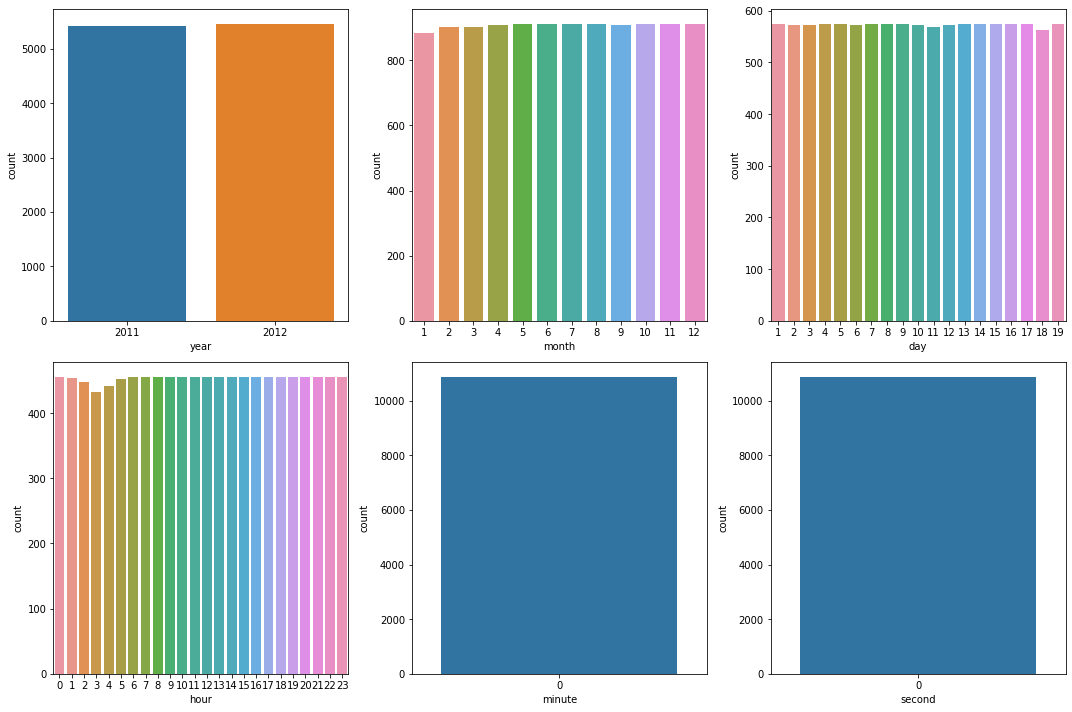

In [28]:
# 6개 datetime 데이터 분포 시각화
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
sns.countplot(data = train_df, x = 'year', ax=axes[0, 0])
sns.countplot(data = train_df, x = 'month', ax=axes[0, 1])
sns.countplot(data = train_df, x = 'day', ax=axes[0, 2])
sns.countplot(data = train_df, x = 'hour', ax=axes[1, 0])
sns.countplot(data = train_df, x = 'minute', ax=axes[1, 1])
sns.countplot(data = train_df, x = 'second', ax=axes[1, 2])
plt.tight_layout(w_pad=1.0, h_pad=1.0)
plt.show()

In [31]:
train_df['month'].value_counts()

5     912
6     912
7     912
8     912
12    912
10    911
11    911
4     909
9     909
2     901
3     901
1     884
Name: month, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split

In [38]:
# 학습할 변수
X = train_df[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity','windspeed', 'year', 'month', 'day', 'hour']]
# 타겟 변수
y = train_df['count']

In [40]:
# 학습/테스트 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
# 모델 함수 설정
model = LinearRegression()

In [44]:
# 모델피팅
model.fit(X_train, y_train)

LinearRegression()

In [45]:
#예측값 생성
y_pred = model.predict(X_test)

In [46]:
from sklearn.metrics import mean_squared_error

In [48]:
# MSE 계산
mse = mean_squared_error(y_test, y_pred)

# RMSE 계산
rmse = np.sqrt(mse)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

MSE: 19945.370053754028
RMSE: 141.22807813517122


In [68]:
# 테스트 데이터프레임 생성
test_df = pd.concat([X_test, y_test], axis= 1)

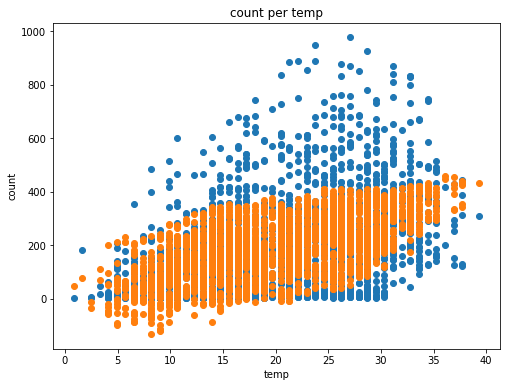

In [78]:
# temp 값에 따른 타겟데이터의 예측값과 실제값 비교
plt.figure(figsize=(8, 6))
plt.scatter(X_test['temp'], y_test)
plt.scatter(X_test['temp'], y_pred)
plt.xlabel('temp')
plt.ylabel('count')
plt.title('count per temp')
plt.show()

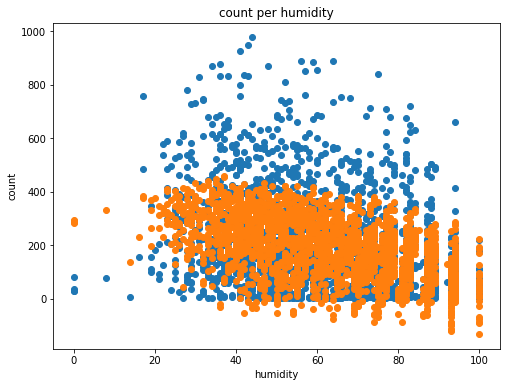

In [80]:
# humidity 값에 따른 타겟데이터의 예측값과 실제값 비교
plt.figure(figsize=(8, 6))
plt.scatter(X_test['humidity'], y_test)
plt.scatter(X_test['humidity'], y_pred)
plt.xlabel('humidity')
plt.ylabel('count')
plt.title('count per humidity')
plt.show()